In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.covariance import EllipticEnvelope
from sklearn.cluster import DBSCAN

%matplotlib notebook

<IPython.core.display.Javascript object>


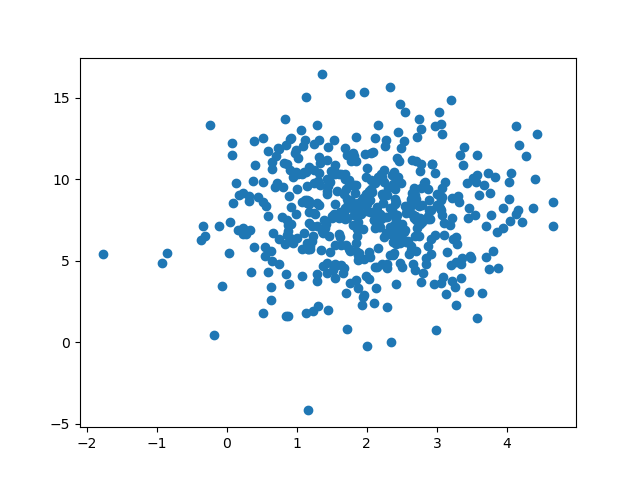

In [37]:
#Getting data

x = np.random.normal(2.0, 1.0, 500)
y = np.random.normal(8.0, 3.0, 500)
data = np.stack((x,y),axis=1)
plt.figure()
plt.scatter(x, y)
plt.show()

<IPython.core.display.Javascript object>


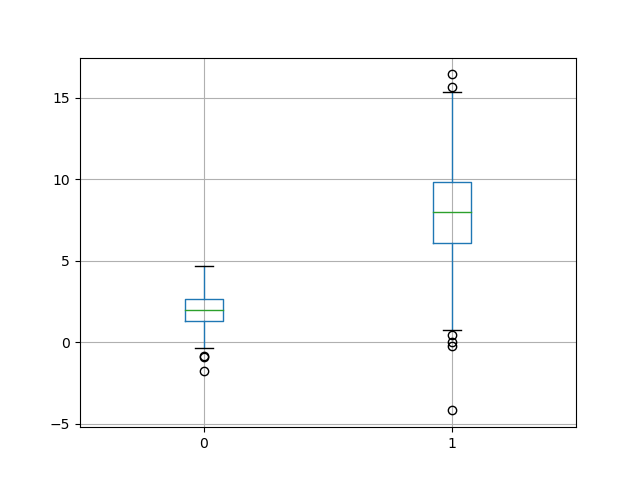

In [38]:
#Boxplot

plt.figure()
pd.DataFrame(data).boxplot()
plt.show()

<IPython.core.display.Javascript object>


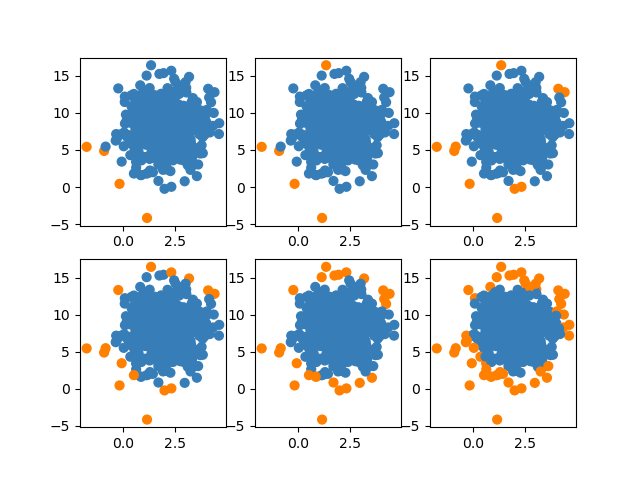

In [39]:
#Eliptic envelope

plt.figure ()
colors = np.array(['#377eb8' , '#ff7f00'])
outliers_fraction= [.007, .01,.02, .03, .05, .1]
for i, of in  enumerate (outliers_fraction):  
    ax = plt.subplot(2,3,i+1)
    algorithm = EllipticEnvelope(contamination=of, random_state=2021).fit(data)
    y_pred = algorithm.predict(data) 
    ax.scatter(data[:, 0], data[:, 1], s=40, color=colors[(y_pred -1) // 2])

<IPython.core.display.Javascript object>


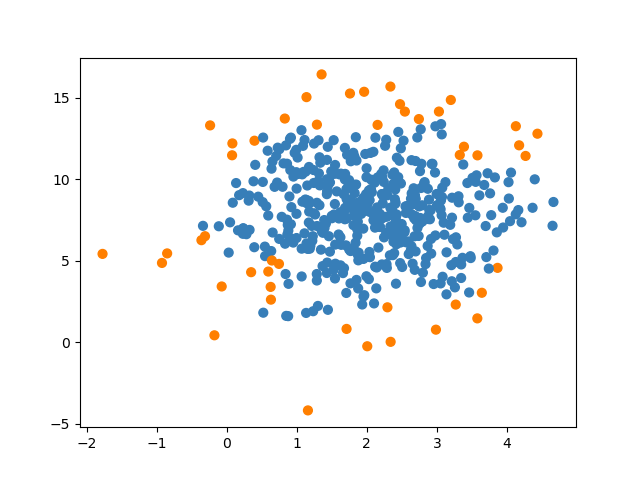

In [40]:
#DBScan

db = DBSCAN().fit(data)
colors_rev = np.array(['#ff7f00', '#377eb8'])
predicted = db.labels_
predicted = predicted.clip(max = 0)
plt.figure ()
plt.scatter(data[:, 0], data[:, 1], s=40, color=colors_rev[predicted+1])